In [1]:
import cv2
import numpy as np
import pylab

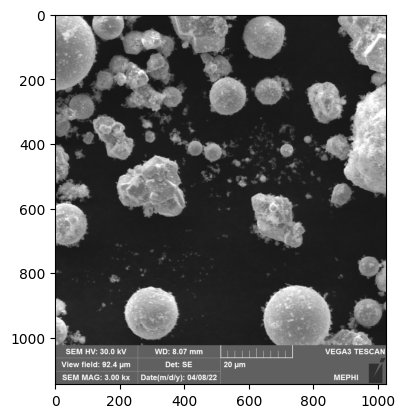

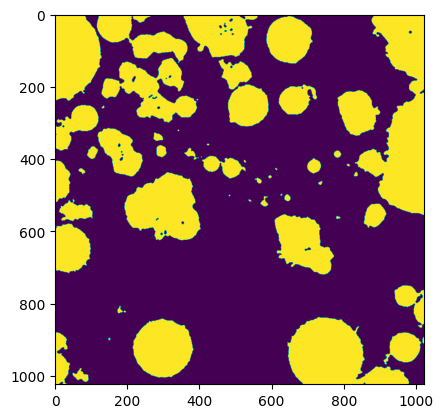

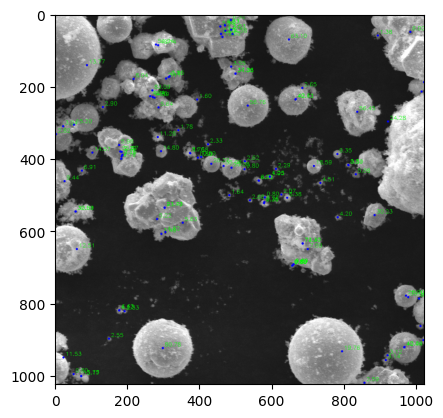

In [6]:
# Load the image
img = cv2.imread('5.png')

pylab.figure(0)
pylab.imshow(img)

img = img[0:1024, 0:1024]


# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the image
_, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_OTSU)

thresh = cv2.medianBlur(thresh, 3)


kernel = np.ones((3, 3), np.uint8)
thresh = cv2.erode(thresh, kernel)
# kernel = np.ones((5, 5), np.uint8)
# thresh = cv2.dilate(thresh, kernel)

thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((1, 1), dtype=int))



# kernel = np.ones((5, 5), np.uint8)
# thresh = cv2.erode(thresh, kernel)
# kernel = np.ones((3, 3), np.uint8)
# thresh = cv2.dilate(thresh, kernel)

# kernel = np.ones((5, 5), np.uint8)
# thresh = cv2.erode(thresh, kernel)
# kernel = np.ones((3, 3), np.uint8)
# thresh = cv2.dilate(thresh, kernel)


# Apply median filtering to remove noise
# median = thresh
median = cv2.medianBlur(thresh, 5)
# median = cv2.medianBlur(median, 7)

pylab.figure(1)
pylab.imshow(median)

maxValue = 255
adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C #cv2.ADAPTIVE_THRESH_GAUSSIAN_C
#cv2.ADAPTIVE_THRESH_GAUSSIAN_C#cv2.ADAPTIVE_THRESH_MEAN_C #cv2.ADAPTIVE_THRESH_GAUSSIAN_C
thresholdType = cv2.THRESH_BINARY#cv2.THRESH_BINARY #cv2.THRESH_BINARY_INV
blockSize = 5 #odd number like 3,5,7,9,11
C = -3 # constant to be subtracted
edges = cv2.adaptiveThreshold(median, maxValue, adaptiveMethod, thresholdType, blockSize, C)

pylab.figure(2)
pylab.imshow(edges)

# Find contours and store their coordinates and sizes in arrays
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# median = cv2.fillPoly(median, pts=contours, color=(255,255,255))

# edges = cv2.adaptiveThreshold(median, maxValue, adaptiveMethod, thresholdType, blockSize, C)

pylab.figure(2)
pylab.imshow(edges)


# contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

particle_coords = []
particle_sizes = []
for contour in contours:
    # Compute the center of the contour using moments
    moments = cv2.moments(contour)
    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
        # Add the center coordinates to the array
        if [cx, cy] not in particle_coords:
            particle_coords.append([cx, cy])
            # Compute the approximate size of the particle using its area
            area = cv2.contourArea(contour)
            size = np.sqrt(area / np.pi)
            # Add the size to the array
            particle_sizes.append(size)

# Display the resulting image with particle centers marked

for i, coords in enumerate(particle_coords):
    cv2.circle(img, (coords[0], coords[1]), 3, (0, 0, 255), -1)
    cv2.putText(img, f"{particle_sizes[i]:.2f}", (coords[0] + 5, coords[1] - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
pylab.figure(2)
pylab.imshow(img)

# Print the coordinates and sizes of the detected particles
#print(particle_coords)
#print(particle_sizes)
#print(len(particle_coords))

In [7]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
from PIL import Image

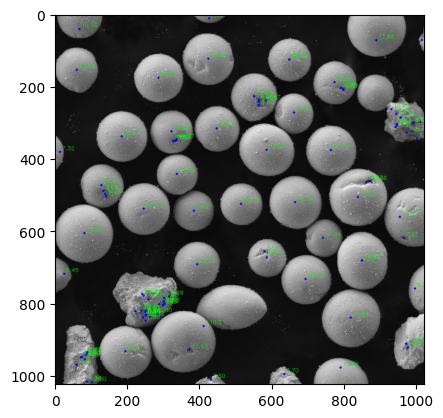

In [8]:
img = img[0:1024, 0:1024]
pylab.imshow(img)